In [2]:
import os,sys
import torch
import torchvision
import argparse
import tqdm
import random
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms.functional as F2
import torchvision.models as models
import torchvision.datasets as datasets
from torchvision.models.feature_extraction import create_feature_extractor
from torch.utils.data import DataLoader, SubsetRandomSampler, Subset
from datasets import *
from utils import *

import matplotlib.pyplot as plt


/home/yunjae_heo/anaconda3/envs/hyj_sam/lib/python3.8/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/yunjae_heo/anaconda3/envs/hyj_sam/lib/python3.8/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please

In [3]:
dpath = '/ailab_mat/dataset/bdd100k'
spath = '/ailab_mat/personal/heo_yunjae/supervision_active_learning/ask_for_help/parameters/bdd100k/model_para.pth'
gpu = '0'

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '3'

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
valset = BDD100K(dpath, 'val')
valloader = DataLoader(valset, 4, shuffle=False, collate_fn=collate_fn)

model = models.detection.fasterrcnn_resnet50_fpn_v2(
    progress = True,
    num_classes = 10,
    weights_backbone = models.ResNet50_Weights,
)
model = model.to(device)

model.load_state_dict(torch.load(spath))
# print(model)

/home/yunjae_heo/anaconda3/envs/hyj_sam/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights_backbone' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights_backbone=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights_backbone=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [5]:
model.eval()
output = model(valset[0][0].unsqueeze(0).to(device))
print(output[0])

# model.train()
# with torch.no_grad():
#     images, targets = valset[0]
#     print(len(targets['boxes']))
#     images = [images]
#     images = list(img.to(device) for img in images)
#     targets = [targets]
#     targets = [{k:v.to(device) for k,v in t.items()} for t in targets]
#     loss = model(images, targets)
#     print(loss)

{'boxes': tensor([[7.8756e+02, 3.6106e+02, 9.0797e+02, 4.2646e+02],
        [8.9056e+02, 3.7451e+02, 9.4839e+02, 4.4541e+02],
        [5.9837e+02, 3.5013e+02, 6.3423e+02, 3.8299e+02],
        [7.5951e+02, 3.6173e+02, 8.0835e+02, 4.1064e+02],
        [6.8140e+02, 3.5891e+02, 7.4131e+02, 3.9177e+02],
        [9.2997e+02, 3.3220e+02, 1.2317e+03, 4.8169e+02],
        [2.5111e+02, 3.4892e+02, 3.4599e+02, 3.9343e+02],
        [7.2958e+02, 3.6145e+02, 7.7850e+02, 4.0284e+02],
        [2.7595e-01, 3.3614e+02, 4.8453e+01, 4.0431e+02],
        [3.5997e+01, 3.4570e+02, 1.3365e+02, 3.9760e+02],
        [6.2844e+02, 2.9510e+02, 6.3775e+02, 3.1307e+02],
        [3.3498e+02, 3.5062e+02, 3.6855e+02, 3.7515e+02],
        [1.0017e+03, 2.8618e+02, 1.0408e+03, 3.2598e+02],
        [1.1985e+03, 4.1797e+02, 1.2800e+03, 5.2052e+02],
        [7.0807e+02, 3.1161e+02, 7.1676e+02, 3.2420e+02],
        [5.8626e+02, 3.5601e+02, 6.0354e+02, 3.7530e+02],
        [5.5048e+02, 3.5675e+02, 5.6477e+02, 3.6878e+02],
    

In [6]:
# print(targets[0]['boxes'].shape)

sample = valset[0][0].clone().type(torch.uint8)

for box in output[0]['boxes']:
    # print(box)
    box = torch.stack([box])
#     print(label)
    sample = torchvision.utils.draw_bounding_boxes(sample, box, colors=(255,0,0), width=5)

# sample = torchvision.utils.draw_bounding_boxes(sample, targets[0]['boxes'], colors=(255,0,0), width=5)
# sample = sample.type(torch.float32)

tensor([787.5632, 361.0608, 907.9712, 426.4628], device='cuda:0',
       grad_fn=<UnbindBackward0>)
tensor([890.5592, 374.5098, 948.3948, 445.4077], device='cuda:0',
       grad_fn=<UnbindBackward0>)
tensor([598.3704, 350.1318, 634.2312, 382.9870], device='cuda:0',
       grad_fn=<UnbindBackward0>)
tensor([759.5131, 361.7256, 808.3490, 410.6390], device='cuda:0',
       grad_fn=<UnbindBackward0>)
tensor([681.3974, 358.9142, 741.3113, 391.7739], device='cuda:0',
       grad_fn=<UnbindBackward0>)
tensor([ 929.9702,  332.1964, 1231.7229,  481.6856], device='cuda:0',
       grad_fn=<UnbindBackward0>)
tensor([251.1054, 348.9162, 345.9889, 393.4312], device='cuda:0',
       grad_fn=<UnbindBackward0>)
tensor([729.5778, 361.4463, 778.5019, 402.8371], device='cuda:0',
       grad_fn=<UnbindBackward0>)
tensor([2.7595e-01, 3.3614e+02, 4.8453e+01, 4.0431e+02], device='cuda:0',
       grad_fn=<UnbindBackward0>)
tensor([ 35.9968, 345.7042, 133.6524, 397.5974], device='cuda:0',
       grad_fn=<Unbind

(-0.5, 1279.5, 719.5, -0.5)

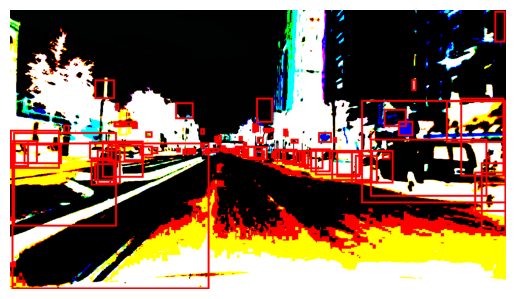

In [7]:
plt.figure()
plt.imshow(sample.permute(1,2,0))
plt.axis(False)